<a href="https://colab.research.google.com/github/Branis333/Water-Quality-Model-peer9/blob/loic/Cyusa_Loic_Copy_of_formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# === Upload and Load Dataset ===
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
# Load the CSV
data = pd.read_csv('water_potability.csv')

In [ ]:
# === Data Preprocessing ===
# Handle missing values via interpolation and fill
data = data.interpolate().bfill().ffill()

# Separate features and labels
X = data.drop('Potability', axis=1)
y = data['Potability']

In [ ]:
# Show class distribution
print("Class distribution:\n", y.value_counts())

Class distribution:
 Potability
0    1998
1    1278
Name: count, dtype: int64


In [ ]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Each Memeber Defines their model Here

In [ ]:
#Model Definition by member Loic
def my_custom_model():
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.005), input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    return model

# Start the training Process

In [ ]:
# Instantiate and compile model
model = my_custom_model()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.005)

In [ ]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001, restore_best_weights=True)

In [ ]:
# === Train the Model ===
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5671 - loss: 1.0805 - val_accuracy: 0.6130 - val_loss: 0.9333
Epoch 2/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6342 - loss: 0.8944 - val_accuracy: 0.6110 - val_loss: 0.8055
Epoch 3/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6241 - loss: 0.7780 - val_accuracy: 0.6130 - val_loss: 0.7162
Epoch 4/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6148 - loss: 0.7073 - val_accuracy: 0.6191 - val_loss: 0.6837
Epoch 5/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6218 - loss: 0.6797 - val_accuracy: 0.6354 - val_loss: 0.6680
Epoch 6/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6481 - loss: 0.6646 - val_accuracy: 0.6415 - val_loss: 0.6668
Epoch 7/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6591 - loss: 0.6598 - val_accuracy: 0.6660 - val_loss: 0.6698
Epoch 8/1000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6633 - loss: 0.6620 - val_accuracy: 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7198 - loss: 0.6127


In [ ]:
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict and threshold
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


Test Loss: 0.6270, Test Accuracy: 0.6972
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Classification Report
cm = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78       300
           1       0.72      0.37      0.49       192

    accuracy                           0.70       492
   macro avg       0.70      0.64      0.64       492
weighted avg       0.70      0.70      0.67       492



Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.78       300
           1       0.72      0.37      0.49       192

    accuracy                           0.70       492
   macro avg       0.70      0.64      0.64       492
weighted avg       0.70      0.70      0.67       492



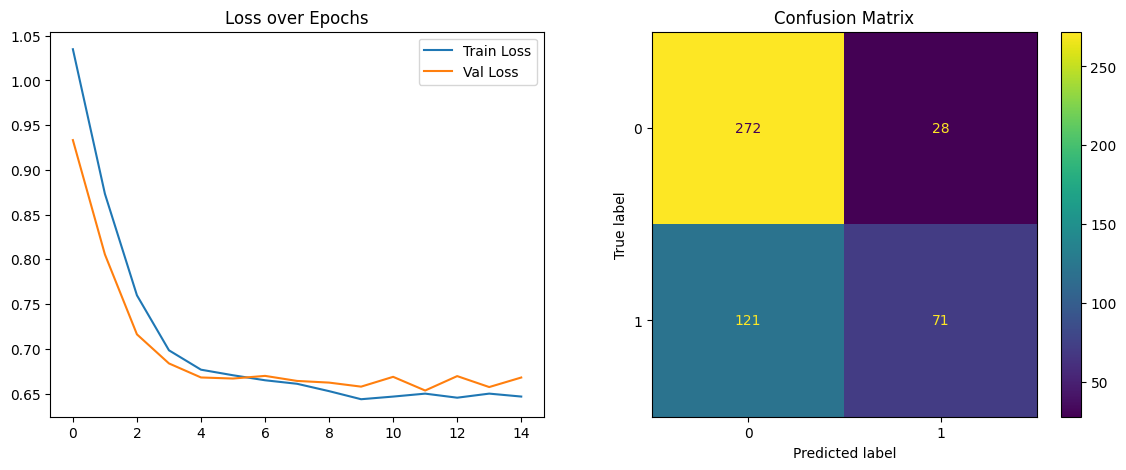

In [ ]:
# Classification Report
cm = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)

# Plot Loss & Confusion Matrix
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Val Loss')
axs[0].set_title('Loss over Epochs')
axs[0].legend()

# Confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix')

plt.show()

In [ ]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)